In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

## General exploration and Analysis

In [67]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [68]:
df.shape

(22699, 18)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### There are no NaN n this dataset, datetimes are objects not datetime dtypes

In [70]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [71]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

## Creation of trip duration in minutes

In [72]:
#create duration of ride field
df['ride_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['ride_duration'] = df['ride_duration'].dt.total_seconds()/60

## Initial analysis of most important variables

### Trip distance (trip_distance']

<Axes: title={'center': 'trip_distance'}, xlabel='trip_distance'>

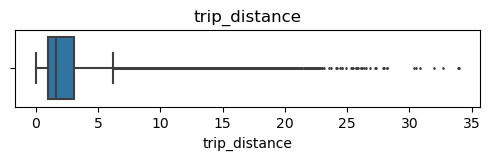

In [73]:
plt.figure(figsize=(6,1))
plt.title('trip_distance')
sns.boxplot(data=None, x = df['trip_distance'], fliersize=1)

In [74]:
df_distance_zero = df[df['trip_distance'] <= 0].sort_values(by='ride_duration')
df_distance_zero

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration
17567,34210304,1,2017-04-25 13:16:31,2017-04-25 13:16:31,1,0.0,1,N,132,264,2,62.00,0.0,0.5,0.00,0.0,0.3,62.80,0.000000
17311,19238418,1,2017-03-07 18:16:47,2017-03-07 18:16:47,1,0.0,1,N,162,264,2,2.50,1.0,0.5,0.00,0.0,0.3,4.30,0.000000
4742,18394854,1,2017-03-05 06:41:16,2017-03-05 06:41:16,1,0.0,5,N,233,264,2,80.84,0.0,0.0,0.00,0.0,0.3,81.14,0.000000
17270,20458610,1,2017-03-26 22:48:51,2017-03-26 22:48:51,1,0.0,1,N,170,264,2,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.000000
16586,87350785,1,2017-10-17 04:39:44,2017-10-17 04:39:44,1,0.0,1,N,145,264,2,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,53536625,2,2017-06-23 14:43:42,2017-06-23 14:51:15,6,0.0,1,N,13,13,2,6.00,0.0,0.5,0.00,0.0,0.3,6.80,7.550000
22043,57581462,1,2017-07-06 10:27:11,2017-07-06 10:40:07,1,0.0,2,N,162,162,3,52.00,0.0,0.5,0.00,0.0,0.3,52.80,12.933333
15916,47368116,1,2017-06-29 19:30:30,2017-06-29 19:43:29,1,0.0,1,N,79,148,3,8.50,1.0,0.5,0.00,0.0,0.3,10.30,12.983333
20080,55620713,2,2017-06-07 10:27:54,2017-06-07 10:54:23,1,0.0,1,N,107,237,1,15.50,0.0,0.5,0.00,0.0,0.3,16.30,26.483333


In [75]:
df_distance_long= df[df['trip_distance']>20].sort_values(by='trip_distance', ascending = False)
df_distance_long

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30,39.216667
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,60.150000
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06,67.483333
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80,37.900000
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38,209.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,74763608,1,2017-09-06 13:44:43,2017-09-06 14:36:38,1,20.20,1,N,132,37,1,58.50,0.0,0.5,11.85,0.00,0.3,71.15,51.916667
19872,24876527,1,2017-03-25 09:33:54,2017-03-25 10:08:49,1,20.20,2,N,209,132,1,52.00,0.0,0.5,11.70,5.76,0.3,70.26,34.916667
19664,80299197,2,2017-09-24 11:22:07,2017-09-24 12:02:21,2,20.11,2,N,132,263,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27,40.233333
8470,80749449,2,2017-09-25 21:52:24,2017-09-25 22:32:00,1,20.08,2,N,132,239,2,52.00,0.0,0.5,0.00,5.76,0.3,58.56,39.600000


Text(0.5, 1.0, 'trip_distance')

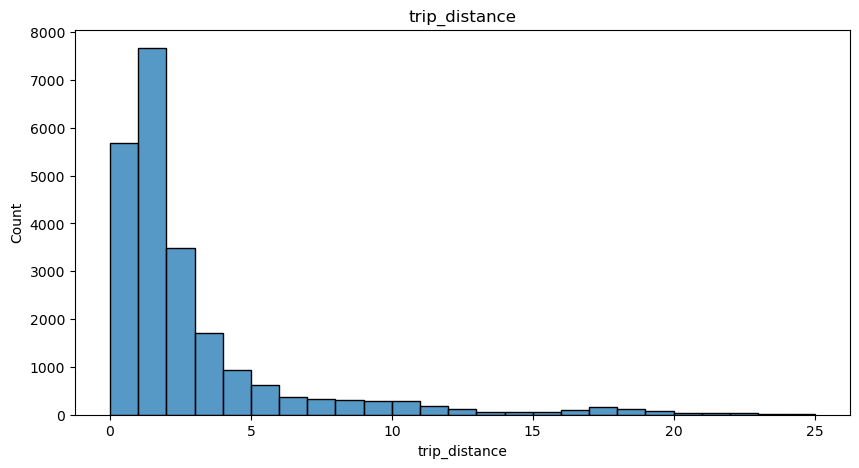

In [76]:
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins= range(0, 26, 1))
plt.title('trip_distance')


### Analysis of trip_distance variable:  There are a number of outliers on he high end as well as 19 rows with a trip distance = 0.  These rows will be addressed in cleaning.

## Ride Duration('ride_duration')

In [77]:
df_duration_less_than_zero = df[df['ride_duration']<=0].sort_values(by='ride_duration', ascending=False)
df_duration_less_than_zero

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration
472,52474677,1,2017-06-20 18:57:39,2017-06-20 18:57:39,1,0.0,1,N,162,264,2,9.50,1.0,0.5,0.0,0.0,0.3,11.30,0.000000
13062,85154968,1,2017-10-10 09:53:00,2017-10-10 09:53:00,1,0.0,1,N,186,264,2,2.50,0.0,0.5,0.0,0.0,0.3,3.30,0.000000
21977,67022415,1,2017-08-08 07:28:47,2017-08-08 07:28:47,2,0.0,1,N,75,264,2,10.50,0.0,0.5,0.0,0.0,0.3,11.30,0.000000
21836,65082578,2,2017-08-01 09:52:15,2017-08-01 09:52:15,3,0.0,5,N,264,143,1,59.00,0.0,0.0,9.0,0.0,0.0,68.00,0.000000
21620,19232159,1,2017-03-07 17:58:40,2017-03-07 17:58:40,1,0.0,1,N,237,264,2,2.50,1.0,0.5,0.0,0.0,0.3,4.30,0.000000
20638,106367018,1,2017-12-15 16:09:43,2017-12-15 16:09:43,1,0.0,1,N,43,264,2,2.50,1.0,0.5,0.0,0.0,0.3,4.30,0.000000
19838,80341574,1,2017-09-24 13:37:55,2017-09-24 13:37:55,1,0.0,1,N,234,264,2,2.50,0.0,0.5,0.0,0.0,0.3,3.30,0.000000
17567,34210304,1,2017-04-25 13:16:31,2017-04-25 13:16:31,1,0.0,1,N,132,264,2,62.00,0.0,0.5,0.0,0.0,0.3,62.80,0.000000
17311,19238418,1,2017-03-07 18:16:47,2017-03-07 18:16:47,1,0.0,1,N,162,264,2,2.50,1.0,0.5,0.0,0.0,0.3,4.30,0.000000
17270,20458610,1,2017-03-26 22:48:51,2017-03-26 22:48:51,1,0.0,1,N,170,264,2,2.50,0.5,0.5,0.0,0.0,0.3,3.80,0.000000


<Axes: title={'center': 'ride_duration'}, xlabel='ride_duration'>

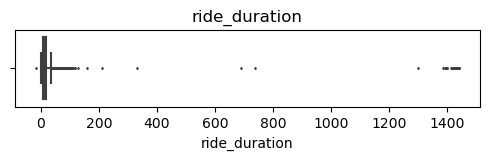

In [78]:
plt.figure(figsize=(6,1))
plt.title('ride_duration')
sns.boxplot(data=None, x = df['ride_duration'], fliersize=1)

<function matplotlib.pyplot.show(close=None, block=None)>

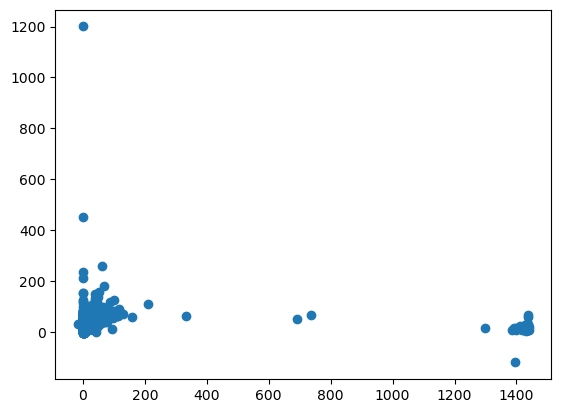

In [79]:
plt.scatter(x=df['ride_duration'], y = df['total_amount'])
plt.show

### The data for ride duration shows a number of outlier both great and small and their inaccuracy can be exemplified by correlating to fare amounts.

## Fare Amount ('fare_amount') and Tip Amount('tip_amount')

<Axes: title={'center': 'fare_amount'}, xlabel='fare_amount'>

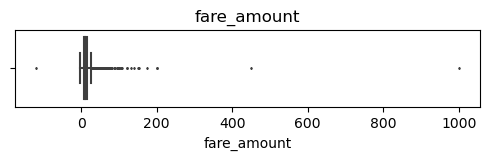

In [80]:
plt.figure(figsize=(6,1))
plt.title('fare_amount')
sns.boxplot(data=None, x = df['fare_amount'], fliersize=1)

Text(0.5, 1.0, 'fare_amount_histogram')

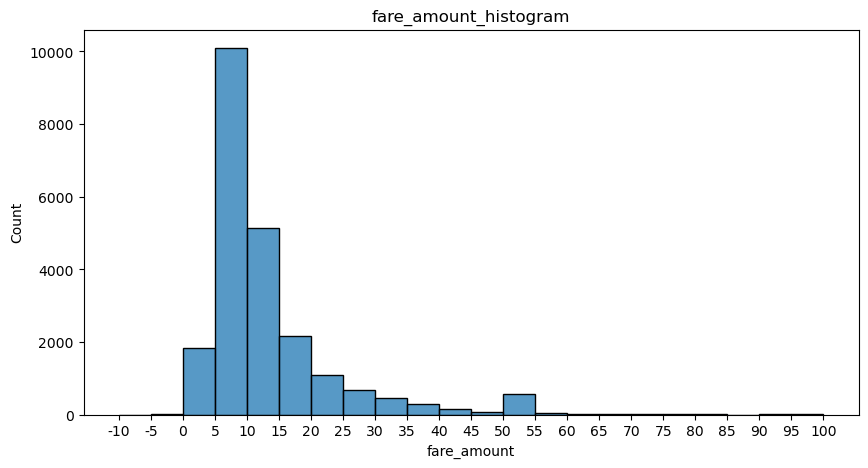

In [81]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df['fare_amount'], bins= range(-10, 101, 5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('fare_amount_histogram')

<Axes: title={'center': 'tip_amount'}, xlabel='tip_amount'>

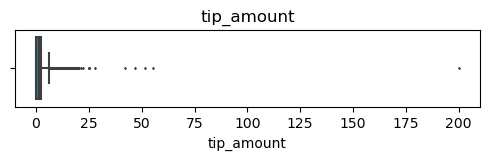

In [82]:
plt.figure(figsize=(6,1))
plt.title('tip_amount')
sns.boxplot(data=None, x = df['tip_amount'], fliersize=1)

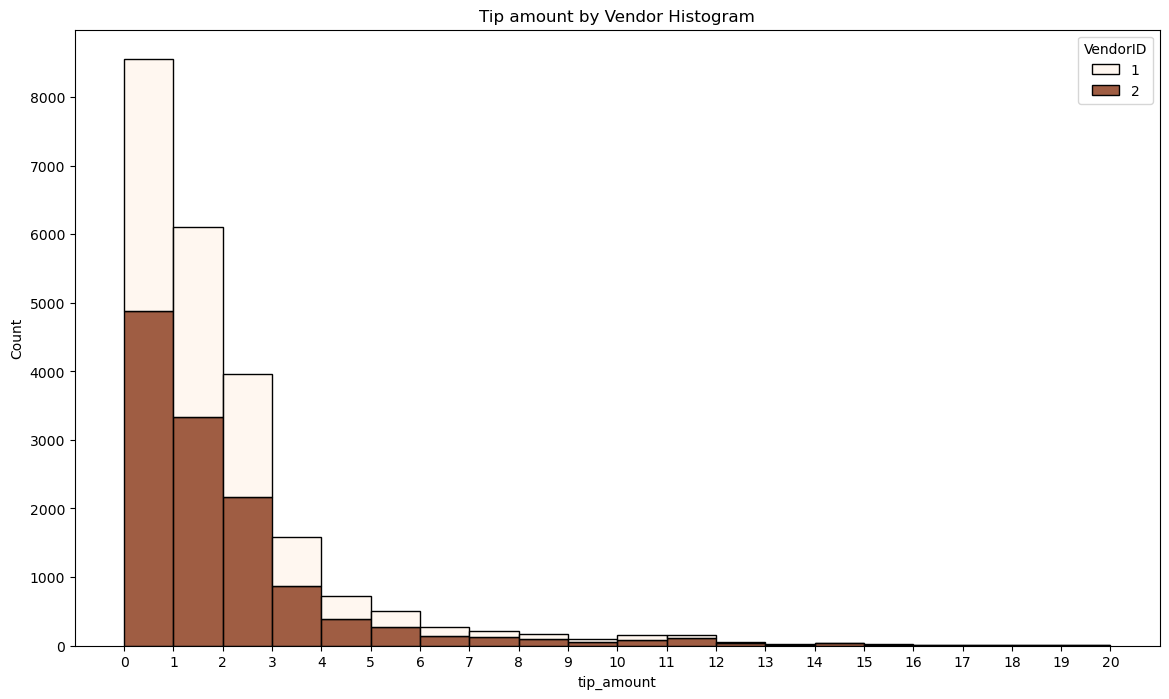

In [83]:
plt.figure(figsize=(14,8))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='Oranges')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by Vendor Histogram');

In [84]:
df_fare_zero = df[df['fare_amount']==0].sort_values(by= 'trip_distance', ascending=False)
df_fare_zero

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration
21842,31708083,1,2017-04-18 16:55:29,2017-04-18 18:29:44,2,20.40,5,N,264,264,3,0.0,0.0,0.0,0.0,12.5,0.3,12.8,94.250000
4402,108016954,2,2017-12-20 16:06:53,2017-12-20 16:47:50,1,7.06,1,N,263,169,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.950000
19067,58713019,1,2017-07-10 14:40:09,2017-07-10 14:40:59,1,0.10,5,N,261,13,3,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.833333
5722,49670364,2,2017-06-12 12:08:55,2017-06-12 12:08:57,1,0.00,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333
10506,26005024,2,2017-03-30 03:14:26,2017-03-30 03:14:28,1,0.00,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333
22566,19022898,2,2017-03-07 02:24:47,2017-03-07 02:24:50,1,0.00,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050000


### Analysis:  There are again a number of outliers in this field as well as a number of zero values.  These will be addressed in cleaning.

## Initial Analysis Passenger Counts('passenger_count')

In [85]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [86]:
df_passenger_zero = df[df['passenger_count'] ==0].sort_values(by='ride_duration', ascending=False)
df_passenger_zero

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration
1516,96563556,1,2017-11-14 15:45:23,2017-11-14 16:26:38,0,8.8,1,N,138,164,1,33.0,0.0,0.5,5.55,5.76,0.3,45.11,41.250000
5767,83401081,1,2017-10-04 15:17:52,2017-10-04 15:56:26,0,10.4,1,N,113,138,1,34.0,0.0,0.5,8.10,5.76,0.3,48.66,38.566667
14527,96810412,1,2017-11-15 10:00:37,2017-11-15 10:24:43,0,5.5,1,N,161,87,1,21.0,0.0,0.5,1.50,0.00,0.3,23.30,24.100000
19217,92734995,1,2017-11-02 19:01:54,2017-11-02 19:25:31,0,2.8,1,N,262,142,2,16.0,1.0,0.5,0.00,0.00,0.3,17.80,23.616667
4919,106693550,1,2017-12-16 14:59:17,2017-12-16 15:21:59,0,3.1,1,N,163,114,1,15.5,0.0,0.5,4.05,0.00,0.3,20.35,22.700000
5603,107019016,1,2017-12-17 12:18:49,2017-12-17 12:40:45,0,4.2,1,N,230,211,1,18.0,0.0,0.5,3.75,0.00,0.3,22.55,21.933333
8595,96507020,1,2017-11-14 12:06:01,2017-11-14 12:27:38,0,7.0,1,N,162,13,1,23.5,0.0,0.5,6.05,0.00,0.3,30.35,21.616667
19456,90729144,1,2017-10-27 14:11:07,2017-10-27 14:32:17,0,2.7,1,N,231,186,1,14.5,0.0,0.5,2.50,0.00,0.3,17.80,21.166667
21752,91222179,1,2017-10-28 22:25:02,2017-10-28 22:43:44,0,1.6,1,N,113,246,1,12.5,0.5,0.5,3.45,0.00,0.3,17.25,18.700000
10145,102526701,1,2017-12-04 10:41:30,2017-12-04 10:58:23,0,2.0,1,N,142,263,1,12.5,0.0,0.5,3.30,0.00,0.3,16.60,16.883333


### Most rides were single occupancy but a significant number were higher, the zero rider data will be addressed.

## Tips

In [87]:
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


Text(0.5, 1.0, 'Mean Tips by Passenger Count')

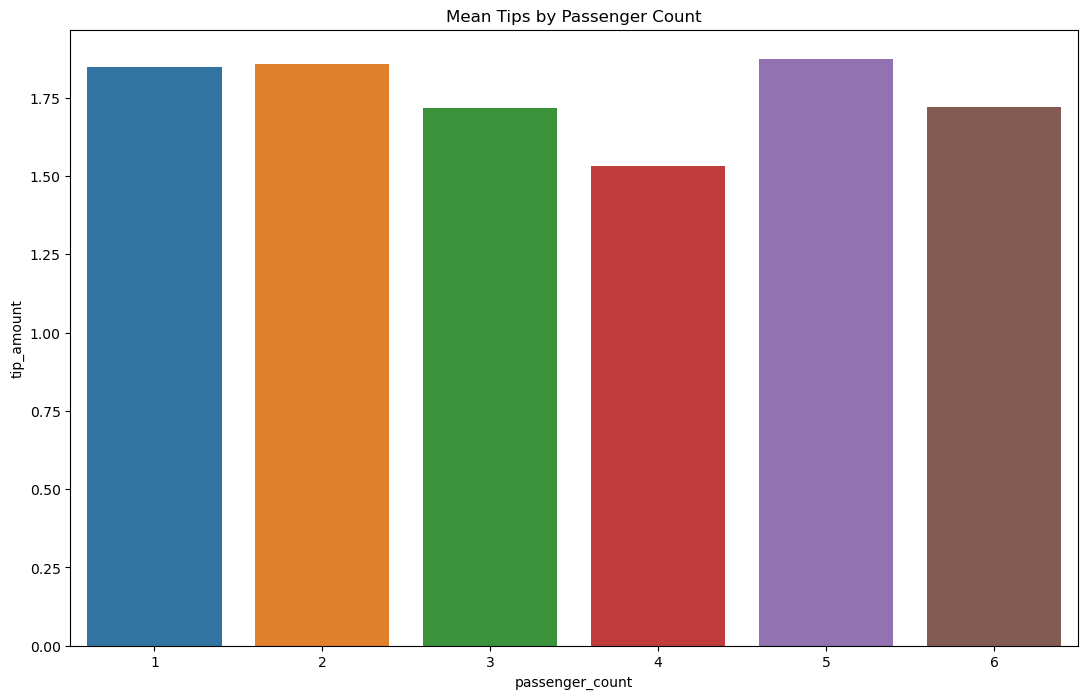

In [88]:
data = mean_tips_by_passenger_count.tail(-1)
plt.figure(figsize=(13,8))
ax = sns.barplot(x= data.index,
                y = data['tip_amount'])
plt.title('Mean Tips by Passenger Count')


In [89]:
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

## Ride Counts by Month and Day

In [90]:
monthly_rides = df['month'].value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
monthly_rides= monthly_rides.reindex(index=month_order)
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

Text(0.5, 1.0, 'Rides by Month')

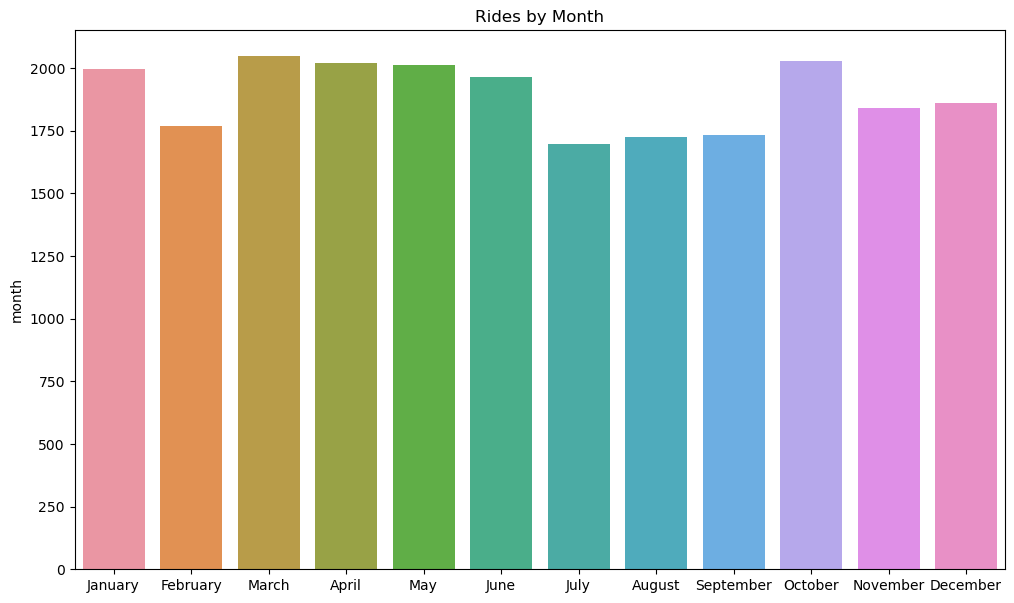

In [91]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y= monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Rides by Month')

In [92]:
daily_rides = df['day'].value_counts()
day_order=  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index= day_order)
daily_rides

Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

Text(0.5, 1.0, 'Rides by Day of the Week')

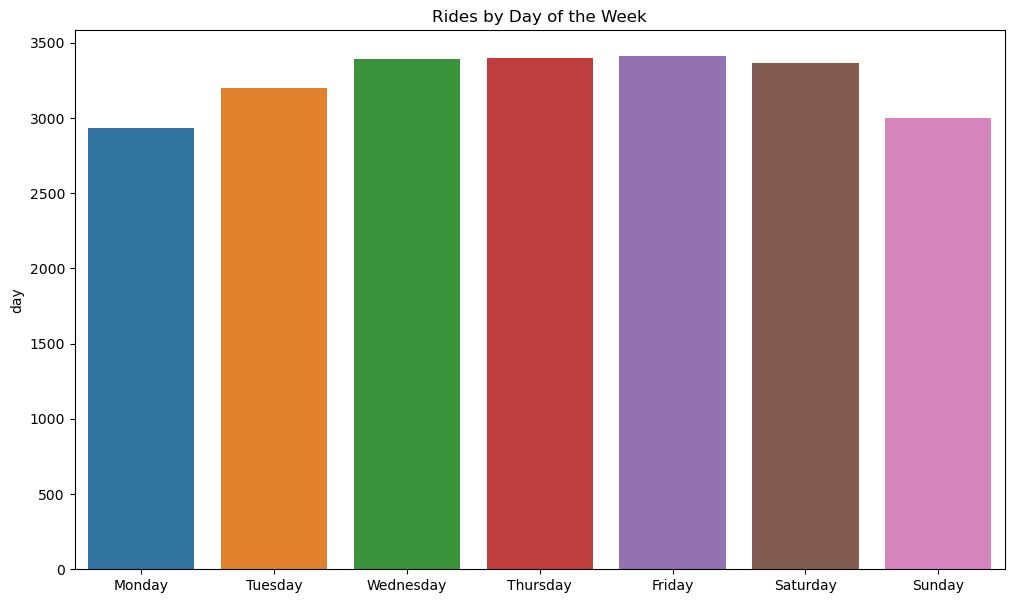

In [93]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y= daily_rides)
ax.set_xticklabels(day_order)
plt.title('Rides by Day of the Week')

### Total Revenue per day of the week

In [94]:
day_order=  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day= df.groupby('day').sum(numeric_only=True)[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


Text(0.5, 1.0, 'Total Revenue(USD) by Day')

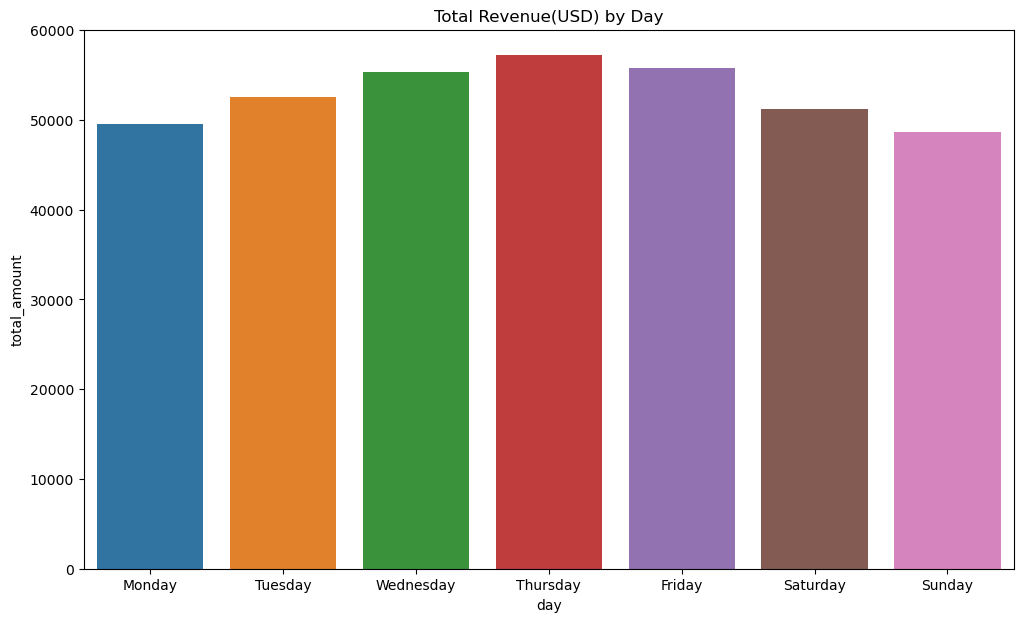

In [95]:
plt.figure(figsize=(12,7))
ax= sns.barplot(x= total_amount_day.index, y = total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
plt.title('Total Revenue(USD) by Day')

### Plot mean trip distance by drop off location

In [96]:
# Number of unique drop off locations
df['DOLocationID'].nunique()

216

In [97]:
ride_distance_by_dropoff = df.groupby('DOLocationID').mean(numeric_only=True)[['trip_distance']]
ride_distance_by_dropoff = ride_distance_by_dropoff.sort_values(by='trip_distance')
ride_distance_by_dropoff

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


Text(0.5, 1.0, 'Mean Trip Distance by Dropoff Location')

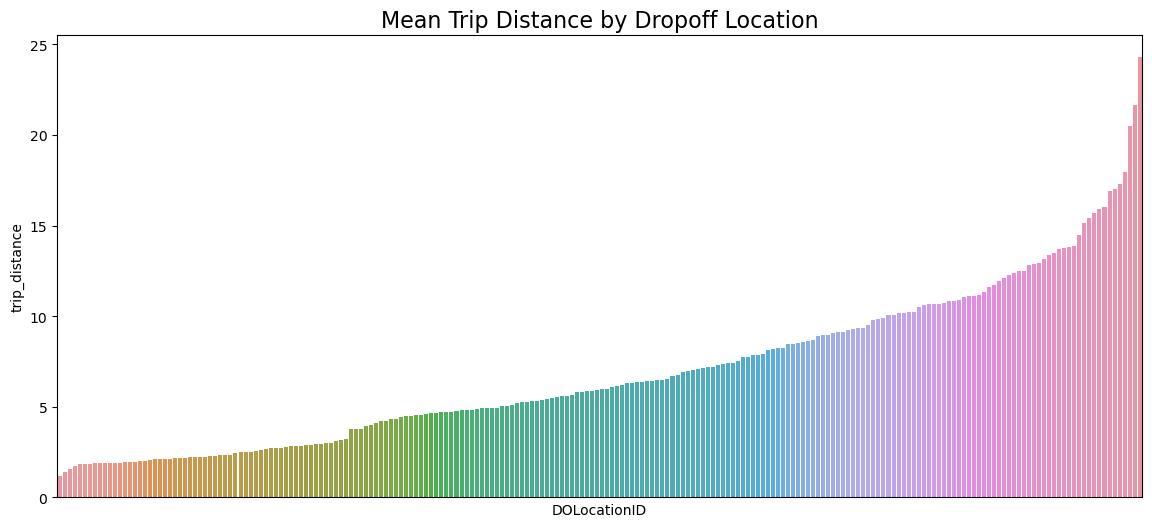

In [98]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x= ride_distance_by_dropoff.index,
                y= ride_distance_by_dropoff['trip_distance'],
                order = ride_distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean Trip Distance by Dropoff Location', fontsize=16)

### The distribution of data by dropoff point demonstrates a roughly normal distribution.

### Rides and revenue show some variation over time periods but not dramatically different.

In [99]:
# eliminate unnecessary column
df.drop('store_and_fwd_flag',axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64       
 13  t

### All data types are now date time or numerical 


## General Analysis of data validity and cleanliness

In [100]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


## Problematic Data Initial
### Negative or zero duration mins
### Extremely long max durations
### Trip Distance of zero
### Fare amount is zero
### Fare amount is excessively high
### Passenger count is zero


In [101]:
df_clean = df

In [102]:
df_clean[df_clean['ride_duration']<=0].shape

(27, 20)

In [103]:
#27 rows exist with ride durations less than or equal to zero.  Deleting these rows as they are a small part of dataset.
df_clean.drop(df_clean[df_clean.ride_duration<=0].index, inplace= True)

In [104]:
df_clean[df_clean['ride_duration']<=0].shape

(0, 20)

In [105]:
df_clean[df_clean.ride_duration > 300].shape

(45, 20)

In [106]:
#There are 45 rows with ride durations in excess of 5 hours(300 min). These rows will also be deleted.
df_clean.drop(df_clean[df_clean.ride_duration>300].index, inplace = True)

In [107]:
df_clean[df_clean.ride_duration > 300].shape

(0, 20)

In [108]:
df_clean[df_clean['trip_distance']<=0].shape

(122, 20)

In [109]:
# there are 122 rows with trip distance = 0, These rows will be deleted.
df_clean.drop(df_clean[df_clean.trip_distance <=0].index, inplace = True)

In [110]:
df_clean[df_clean['trip_distance']<=0].shape

(0, 20)

In [111]:
df_clean[df_clean['fare_amount']<=0].shape

(15, 20)

In [112]:
#Dropping 15 rows with zero fare amount
df_clean.drop(df_clean[df_clean.fare_amount<=0].index, inplace = True)
df_clean[df_clean['fare_amount']<=0].shape

(0, 20)

In [113]:
df_clean_high_fares = df_clean[df_clean['total_amount']> 10
                               *np.mean(df_clean['total_amount'])]
df_clean_high_fares.sort_values(by='total_amount', ascending= False)
    

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration,month,day
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.60,5,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29,0.966667,February,Monday
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,60.150000,May,Friday
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06,67.483333,June,Tuesday


In [114]:
#There is 1 total fare amount that is excessivley high that will be droppped
df_clean.drop(df_clean[df_clean['total_amount']>1000].index, inplace = True)
df_clean_high_fares = df_clean[df_clean['total_amount']> 10
                               *np.mean(df_clean['total_amount'])]
df_clean_high_fares.sort_values(by='total_amount', ascending= False)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration,month,day
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,60.150000,May,Friday
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06,67.483333,June,Tuesday


In [115]:
# Passenger count 0
df_pass_zero = df_clean[df_clean['passenger_count']==0]
df_pass_zero.shape

(32, 20)

In [116]:
df_pass_zero

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration,month,day
1516,96563556,1,2017-11-14 15:45:23,2017-11-14 16:26:38,0,8.8,1,138,164,1,33.0,0.0,0.5,5.55,5.76,0.3,45.11,41.250000,November,Tuesday
1874,102273749,1,2017-12-03 12:05:52,2017-12-03 12:13:51,0,1.1,1,48,237,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,7.983333,December,Sunday
1925,75654951,1,2017-09-09 03:44:45,2017-09-09 03:49:19,0,0.8,1,48,48,2,5.0,0.5,0.5,0.00,0.00,0.3,6.30,4.566667,September,Saturday
3352,107464306,1,2017-12-18 22:44:57,2017-12-18 23:00:24,0,2.7,1,87,79,1,12.5,0.5,0.5,2.75,0.00,0.3,16.55,15.450000,December,Monday
4060,100326273,1,2017-11-27 13:08:01,2017-11-27 13:17:55,0,1.7,1,161,239,1,9.0,0.0,0.5,1.95,0.00,0.3,11.75,9.900000,November,Monday
4919,106693550,1,2017-12-16 14:59:17,2017-12-16 15:21:59,0,3.1,1,163,114,1,15.5,0.0,0.5,4.05,0.00,0.3,20.35,22.700000,December,Saturday
5563,74279671,1,2017-09-04 17:40:00,2017-09-04 17:51:52,0,1.3,1,164,233,1,9.0,0.0,0.5,1.95,0.00,0.3,11.75,11.866667,September,Monday
5603,107019016,1,2017-12-17 12:18:49,2017-12-17 12:40:45,0,4.2,1,230,211,1,18.0,0.0,0.5,3.75,0.00,0.3,22.55,21.933333,December,Sunday
5668,106785624,1,2017-12-16 19:50:12,2017-12-16 20:00:30,0,1.0,1,211,249,1,8.0,0.0,0.5,1.50,0.00,0.3,10.30,10.300000,December,Saturday
5767,83401081,1,2017-10-04 15:17:52,2017-10-04 15:56:26,0,10.4,1,113,138,1,34.0,0.0,0.5,8.10,5.76,0.3,48.66,38.566667,October,Wednesday


In [117]:
np.mean(df_clean['passenger_count'][df_clean['passenger_count']>0])

1.6454112303513382

In [118]:
np.median(df_clean['passenger_count'][df_clean['passenger_count']>0])

1.0

In [119]:
# Generally the rest of the data in rows with passenger coynt = 0 looks valid,
#so the passenger count will have passenger count converted to 1(the median)
df_clean.loc[df_clean['passenger_count'] == 0, 'passenger_count'] = 1
df_clean[df_clean['passenger_count']== 0].shape

(0, 20)

In [120]:
df_clean.shape

(22489, 20)

### We have elimionated 210 rows of data with problematic fields

## Creating a new column that includes all of the required fares and tolls but eliminates the tip due to their discretionary nature.

In [121]:
df_clean['total_fare_minus_tip']= df_clean['total_amount'] - df_clean['tip_amount']


In [122]:
#Determining likely errors in fares by creating a new column dollars per mile
df_clean['dollars_per_mile'] = df_clean['total_fare_minus_tip']/df_clean['trip_distance']
df_clean.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration,month,day,total_fare_minus_tip,dollars_per_mile
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,100,231,1,...,0.5,2.76,0.0,0.3,16.56,14.066667,March,Saturday,13.8,4.131737
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,186,43,1,...,0.5,4.00,0.0,0.3,20.80,26.500000,April,Tuesday,16.8,9.333333
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,262,236,1,...,0.5,1.45,0.0,0.3,8.75,7.200000,December,Friday,7.3,7.300000


In [123]:
df_clean.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration,total_fare_minus_tip,dollars_per_mile
count,2.248900e+04,22489.000000,22489.000000,22489.000000,22489.000000,22489.000000,22489.000000,22489.000000,22489.000000,22489.000000,22489.000000,22489.000000,22489.000000,2.248900e+04,22489.000000,22489.000000,22489.000000,22489.000000
mean,5.675634e+07,1.555961,1.644493,2.931268,1.031882,162.345324,161.457735,1.332207,12.923968,0.333496,0.498666,1.823455,0.309446,3.000000e-01,16.194361,14.425323,14.370906,8.457287
std,3.273584e+07,0.496870,1.284238,3.654989,0.229857,66.594261,70.092585,0.489715,10.819839,0.461053,0.025792,2.430776,1.385757,1.169646e-13,13.403908,11.648887,11.780577,77.684671
min,1.212700e+04,1.000000,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,3.300000,0.016667,3.300000,0.380000
25%,2.854340e+07,1.000000,1.000000,1.000000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,8.750000,6.716667,7.800000,4.777328
50%,5.674552e+07,2.000000,1.000000,1.630000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,3.000000e-01,11.800000,11.233333,10.300000,6.266667
75%,8.537101e+07,2.000000,2.000000,3.090000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,3.000000e-01,17.800000,18.383333,15.800000,8.194444
max,1.134863e+08,2.000000,6.000000,33.960000,5.000000,265.000000,265.000000,4.000000,200.010000,4.500000,0.500000,55.500000,19.100000,3.000000e-01,258.210000,209.166667,206.570000,5856.000000


In [124]:
df_clean['dollars_per_mile'].describe()

count    22489.000000
mean         8.457287
std         77.684671
min          0.380000
25%          4.777328
50%          6.266667
75%          8.194444
max       5856.000000
Name: dollars_per_mile, dtype: float64

<Axes: title={'center': 'dollars_per_mile'}, xlabel='dollars_per_mile'>

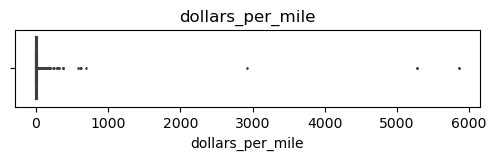

In [125]:
# Exploring data rows where dollars per mile is outlier
plt.figure(figsize=(6,1))
plt.title('dollars_per_mile')
sns.boxplot(data=None, x = df_clean['dollars_per_mile'], fliersize=1)

### There are several outliers in the data that will be explored further

In [126]:
iqr = 8.19444- 4.777328
iqr
df_clean_high_rate = df_clean[df_clean['dollars_per_mile']>8.19444+1.5*iqr]
df_clean_high_rate

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration,month,day,total_fare_minus_tip,dollars_per_mile
60,34663272,2,2017-04-26 18:08:41,2017-04-26 18:11:08,5,0.38,1,236,236,1,...,0.5,1.16,0.0,0.3,6.96,2.450000,April,Wednesday,5.8,15.263158
63,83622942,2,2017-10-05 09:39:28,2017-10-05 09:42:32,6,0.22,3,48,48,2,...,0.0,0.00,0.0,0.3,21.80,3.066667,October,Thursday,21.8,99.090909
145,28327177,1,2017-04-06 02:45:19,2017-04-06 02:47:22,1,0.30,1,170,170,2,...,0.5,0.00,0.0,0.3,4.80,2.050000,April,Thursday,4.8,16.000000
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,132,132,2,...,0.5,0.00,0.0,0.3,52.80,0.966667,November,Saturday,52.8,229.565217
170,46716747,1,2017-05-31 20:58:40,2017-05-31 21:02:51,2,0.30,1,237,237,2,...,0.5,0.00,0.0,0.3,5.80,4.183333,May,Wednesday,5.8,19.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22557,58013284,2,2017-07-07 20:57:59,2017-07-07 21:01:55,1,0.33,1,79,148,1,...,0.5,1.16,0.0,0.3,6.96,3.933333,July,Friday,5.8,17.575758
22569,79057964,1,2017-09-20 09:18:41,2017-09-20 09:32:05,1,0.60,1,90,234,1,...,0.5,1.20,0.0,0.3,11.00,13.400000,September,Wednesday,9.8,16.333333
22616,34075469,1,2017-04-25 02:55:40,2017-04-25 02:56:50,1,0.20,1,249,113,2,...,0.5,0.00,0.0,0.3,4.30,1.166667,April,Tuesday,4.3,21.500000
22617,82975513,2,2017-10-03 08:37:50,2017-10-03 08:43:39,1,0.32,1,234,137,1,...,0.5,1.26,0.0,0.3,7.56,5.816667,October,Tuesday,6.3,19.687500


### An excessively large number of rows meet the statistical definition of outliers (935).  This may be an excessive amount of culling if all of thse are deleted.  We will delete the most extreme rows only


In [127]:
df_clean_high_rate.sort_values(by=['dollars_per_mile'],ascending=False).head(10)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration,month,day,total_fare_minus_tip,dollars_per_mile
19827,59839344,2,2017-07-14 06:09:54,2017-07-14 06:11:40,1,0.01,2,132,132,2,...,0.5,0.00,5.76,0.3,58.56,1.766667,July,Friday,58.56,5856.000000
19644,105577859,2,2017-12-13 12:19:29,2017-12-13 12:19:39,1,0.01,2,132,132,1,...,0.5,17.57,5.76,0.3,76.13,0.166667,December,Wednesday,58.56,5856.000000
3609,98165974,2,2017-11-19 07:17:16,2017-11-19 07:17:19,1,0.01,2,264,239,2,...,0.5,0.00,0.00,0.3,52.80,0.050000,November,Sunday,52.80,5280.000000
8197,39498898,2,2017-05-16 13:33:23,2017-05-16 13:33:37,1,0.01,2,100,100,2,...,0.5,0.00,0.00,0.3,52.80,0.233333,May,Tuesday,52.80,5280.000000
5429,104244836,2,2017-12-09 11:56:56,2017-12-09 11:58:13,1,0.02,2,186,186,1,...,0.5,11.71,5.76,0.3,70.27,1.283333,December,Saturday,58.56,2928.000000
21088,68563779,2,2017-08-13 16:09:35,2017-08-13 16:10:56,1,0.03,3,170,170,2,...,0.0,0.00,0.00,0.3,20.80,1.350000,August,Sunday,20.80,693.333333
5200,90105531,1,2017-10-25 18:08:16,2017-10-25 18:08:35,1,0.10,2,132,132,1,...,0.5,5.00,5.76,0.3,68.06,0.316667,October,Wednesday,63.06,630.600000
4541,2618392,2,2017-01-10 18:25:47,2017-01-10 18:42:09,5,0.02,1,236,239,2,...,0.5,0.00,0.00,0.3,12.30,16.366667,January,Tuesday,12.30,615.000000
3288,66798269,1,2017-08-07 10:20:05,2017-08-07 10:20:53,1,0.10,2,162,163,1,...,0.5,8.00,5.76,0.3,66.56,0.800000,August,Monday,58.56,585.600000
9188,26279873,2,2017-03-31 05:29:19,2017-03-31 05:29:32,1,0.01,1,249,249,2,...,0.5,0.00,0.00,0.3,3.80,0.216667,March,Friday,3.80,380.000000


### The top 5 dollars per mile rides are the most extreme and will be deleted.

In [128]:
df_clean.drop(df_clean[df_clean['dollars_per_mile']>1000].index, inplace=True)

In [129]:
df_clean.shape

(22484, 22)

In [130]:
df_clean.to_csv('tlc_data_clean.csv', index = False)

### The dataframe is now cleaned and is ready for further analysis.